# Removendo as duplicadas

In [115]:
import pandas as pd

df = pd.read_csv('googleplaystore.csv')

df_drop_duplicates = df.drop_duplicates(subset=['App'])

# Grafico de barras com os top 5 apps por número de instalação

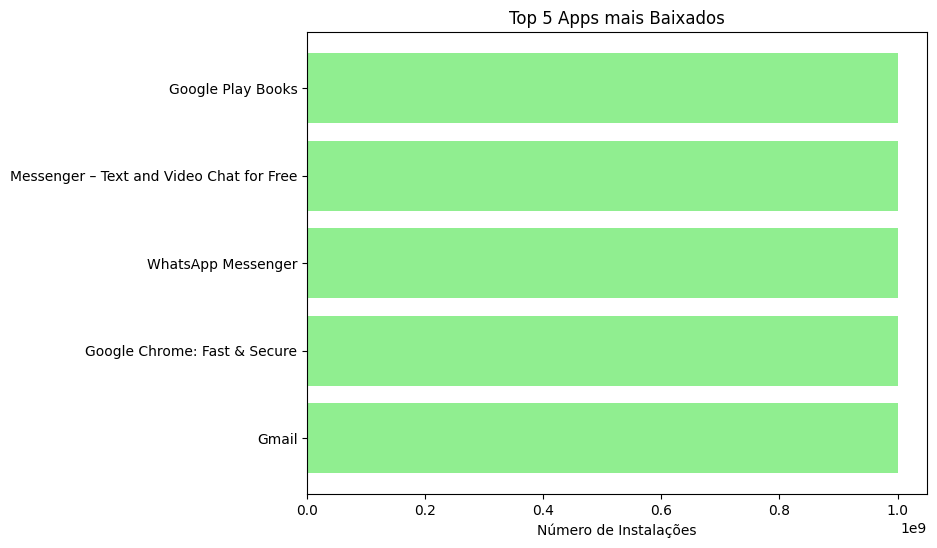

In [116]:
import pandas as pd 
import matplotlib.pyplot as plt

df = df_drop_duplicates

df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','')

df = df[~df['Installs'].str.lower().str.contains('free', na=False)].copy()

df['Installs'] = df['Installs'].astype(int)

topApps = df.nlargest(5, 'Installs')

plt.figure(figsize=(8, 6))
plt.barh(topApps['App'], topApps['Installs'], color='lightgreen')
plt.xlabel('Número de Instalações')
plt.title('Top 5 Apps mais Baixados')
plt.gca().invert_yaxis()
plt.show()

# Grafico de pizza (pie chart) de todas as categorias de apps existentes no dataset de acordo com sua frequência

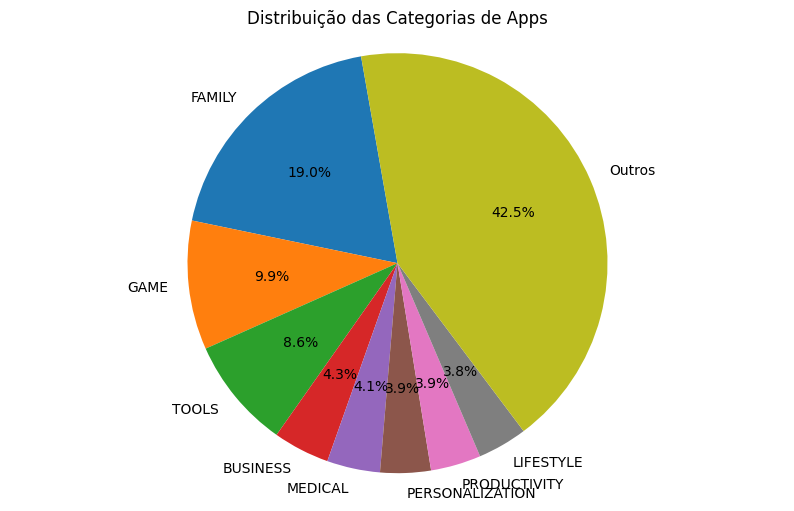

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

df_categories = df_drop_duplicates

count = df_categories['Category'].value_counts()

total_categorias =  count.sum()
porcentagem = count / total_categorias * 100

categoria_porcentagem = count[porcentagem >= 3.6]
categoria_porcentagem['Outros'] = count[porcentagem < 3.6].sum()



plt.figure(figsize=(10, 6))
plt.pie(categoria_porcentagem, labels=categoria_porcentagem.index, autopct='%1.1f%%', startangle=100)
plt.title('Distribuição das Categorias de Apps')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja desenhado como um círculo
plt.show()

# App mais carro do dataset

In [118]:
import pandas as pd

df = df_drop_duplicates

df['Price'] = df['Price'].str.lower().replace('everyone', pd.NA)
df['Price'] = df['Price'].replace({'\\$':''}, regex=True)

df['Price'] = df['Price'].str.strip()

df = df.dropna(subset='Price')

df.loc[:,'Price'] = df['Price'].astype(float)

precos = df['Price'].max()

mais_caro = df[df['Price'] == precos]

print(f"O app mais caro é: {mais_caro['App'].values[0]} que custa {precos}")

O app mais caro é: I'm Rich - Trump Edition que custa 400.0


# Todos os apps classificados como mature 17+

In [119]:
import pandas as pd

df = df_drop_duplicates

app_maior_17 = df[df['Content Rating'] == 'Mature 17+'].shape[0]
# quant = len(app_maior_17)
print(f'Existem {app_maior_17} Apps para maiores de 17 anos')

Existem 393 Apps para maiores de 17 anos


# Top 10 apps por número de review

In [120]:
import pandas as pd

df = df_drop_duplicates

df_avaliacao = df_drop_duplicates.copy()

def convert_reviews(review):
    if isinstance(review, str):
        if 'M' in review:
            return int(float(review.replace('M', '').strip()) * 1_000_000)
        else:
            return int(review.replace(',', '').strip())
    else:
        return review 

df_avaliacao['Reviews'] = df_avaliacao['Reviews'].apply(convert_reviews)

top_10 = df_avaliacao.nlargest(10, 'Reviews')

top_10_nomes = top_10[['App', 'Reviews']]

display(top_10_nomes)


,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723
4005,Clean Master- Space Cleaner & Antivirus,42916526
1654,Subway Surfers,27722264
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1660,Clash Royale,23133508


# Criação de mais 2 calculos para o script anterior

A média de downloads dos 10 aplicativos principais é: 1480000


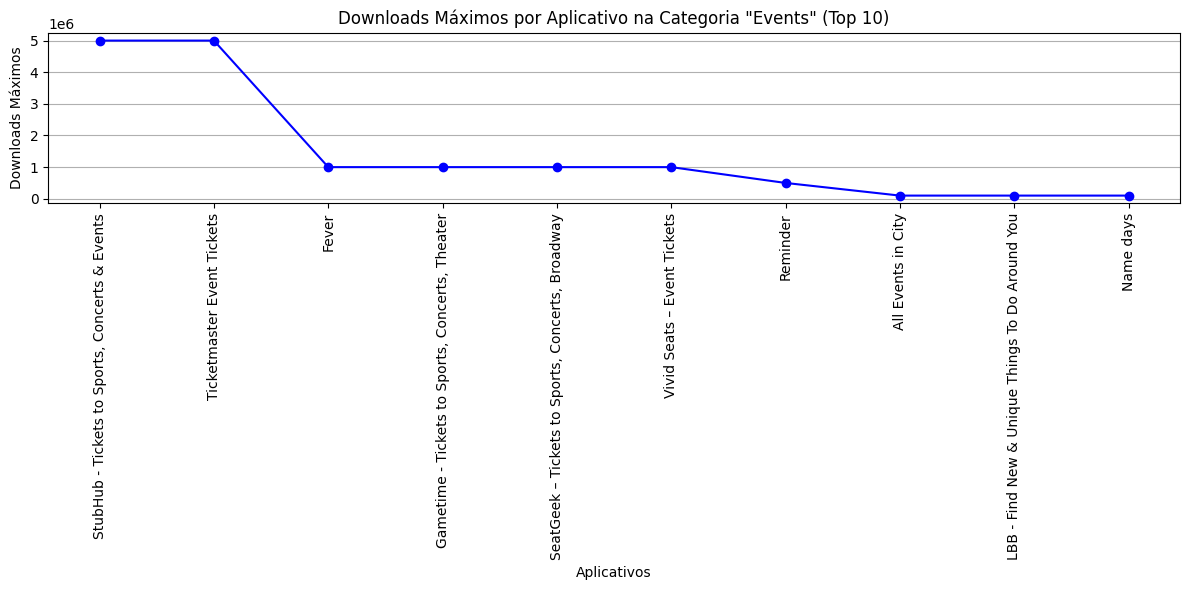

In [121]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculo de valor que mostra a media de instalção dos top 10 apps da categoria Eventos 
df_events = df_drop_duplicates.copy()
df_events = df_events[df_events['Category'] == 'EVENTS']
df_events['Installs'] = df_events['Installs'].replace('Free', pd.NA, regex=True).astype(float)
df_download = df_events.groupby('App')['Installs'].max().reset_index()

df_downloads = df_download.sort_values(by='Installs', ascending=False).head(10)

media_downloads_top10 = df_downloads['Installs'].mean()
print(f"A média de downloads dos 10 aplicativos principais é: {media_downloads_top10:.0f}")

# Criando o gráfico de linhas do top 10 apps mais baixados da categoria events
plt.figure(figsize=(12, 6))
plt.plot(df_downloads['App'], df_downloads['Installs'], marker='o', color='blue', linestyle='-')
plt.title('Downloads Máximos por Aplicativo na Categoria "Events" (Top 10)')
plt.xlabel('Aplicativos')
plt.ylabel('Downloads Máximos')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


,Category,Rating
0,ART_AND_DESIGN,4.357377
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.344970
5,COMICS,4.181481
8,EDUCATION,4.364407
10,EVENTS,4.435556
11,FAMILY,4.179664
14,GAME,4.247368
15,HEALTH_AND_FITNESS,4.243033


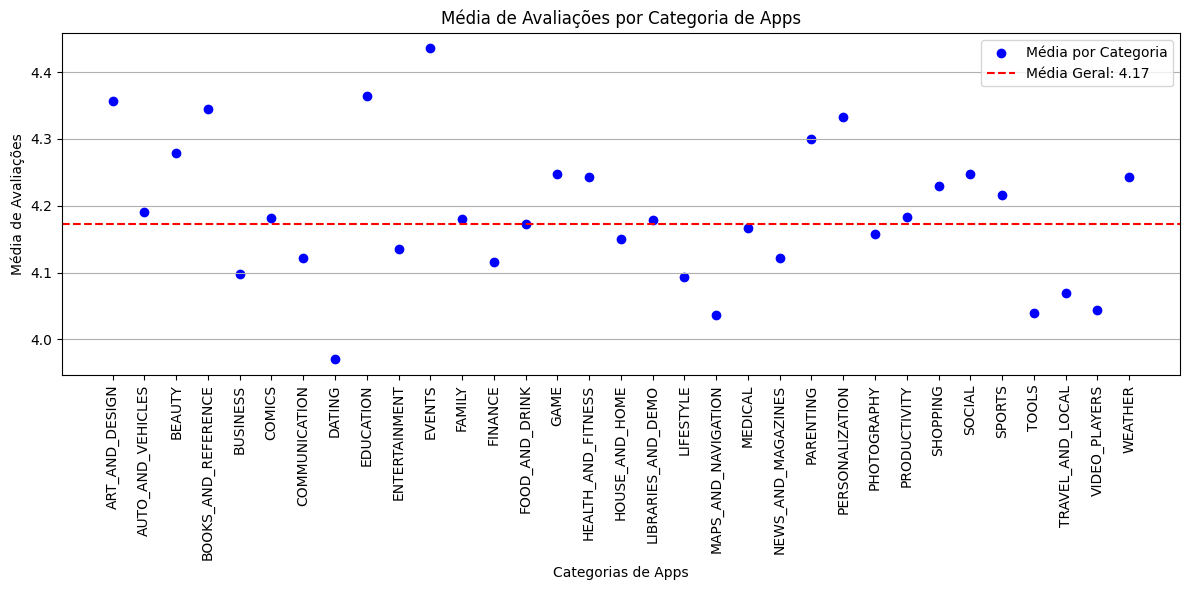

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculo de lista que mostra todas as categorias de apps que estão acima da media de avaliações
df_avaliacao = df_drop_duplicates.copy()
df_avaliacao['Rating'] = pd.to_numeric(df_avaliacao['Rating'].replace(19., pd.NA), errors='coerce')
df_avaliacao = df_avaliacao[df_avaliacao['Category'] != '1.9']

media_geral = df_avaliacao['Rating'].mean()

categoria = df_avaliacao.groupby('Category')['Rating'].mean().reset_index()

categoria_maior_media = categoria[categoria['Rating'] > media_geral]

display(categoria_maior_media)

# Criando o gráfico de avaliação de todas as categorias
plt.figure(figsize=(12, 6))
plt.scatter(categoria['Category'], categoria['Rating'], color='blue', label='Média por Categoria')
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral: {media_geral:.2f}')
plt.title('Média de Avaliações por Categoria de Apps')
plt.xlabel('Categorias de Apps')
plt.ylabel('Média de Avaliações')
plt.legend()
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
